In [33]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [34]:
T=np.array([[0.8,0.2],[0.2,0.8]])
E=np.array([[0.5,0.9],[0.5,0.1]])


Dado que la secuencia es S,C,C,C,S,C,S,C

In [35]:
States = np.array([0,1]) # Deben ser enteros 
Prior =  np.array([0.2,0.8])
# Con 0=Cara y 1= Sello
Obs = np.array([1,0,0,0,1,0,1,0])

In [36]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [37]:
HiddenStates = GetStates(States,8)
len(HiddenStates)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


256

In [38]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

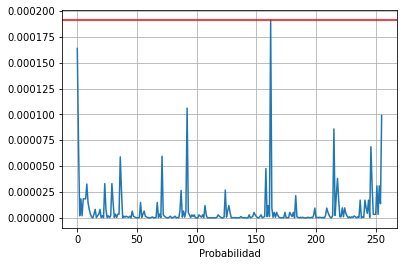

In [43]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)

plt.plot(P)
plt.grid()
plt.xlabel('Secuancias ocultas')
plt.xlabel('Probabilidad')
plt.axhline(y=np.amax(P),color='r')

In [44]:
ii = np.where( P == np.amax(P))
print(HiddenStates[ii])

[[1 1 1 1 0 0 0 0]]


In [48]:
print(ii)
print(np.amax(P))

(array([162], dtype=int64),)
0.0001911029760000001


b) La secuencia oculta más probable fue que en los primeros 4 lanzmientos la moneda era justa, mientras que en los otros 4 fue sesgada. La probabilidad de esta secuencia oculta es de 0.0002

In [52]:
# C)
ObsStates = GetStates([0,1],8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [50]:
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

Text(0, 0.5, 'Probabilidad')

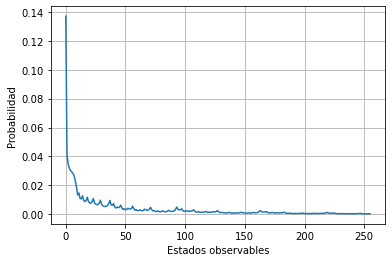

In [58]:
plt.plot(PObs)
plt.grid()
plt.xlabel('Estados observables')
plt.ylabel('Probabilidad')

In [59]:
np.sum(PObs)

1.0000000000000007

e) La probabilidad a-priori influye en las probabilidades de las secuencias ocultas, pues al comenzar la secuencia para la matriz de transición se toma está probabilidad como punto de partida en el primer termino de la productoria. De igual forma, por la propiedad de Markov, se sabe que la probabilidad de cada estado esta definida únicamente por el estado inmediatamente anterior

$$\mathbb{P}(X_{n+1}=x_{n+1}/X_{0}=x_{0}...,X_{n}=x_{n})=\mathbb{P}(X_{n+1}=x_{n+1}/X_{n}=x_{n})$$